<a href="https://colab.research.google.com/github/AeyshaAkterPurnia/CVPR/blob/main/Number-detection/mnist_nn_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.models import load_model
import random
import numpy as np
import cv2

In [2]:
(train_img, train_labels),(test_img, test_labels) = mnist.load_data()
print(f"shape of train images: {train_img.shape}")
print(f"shape of train lables: {train_labels.shape}")
print(f"shape of test images: {test_img.shape}")
print(f"shape of test labels: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape of train images: (60000, 28, 28)
shape of train lables: (60000,)
shape of test images: (10000, 28, 28)
shape of test labels: (10000,)


image in index 0 is '5'


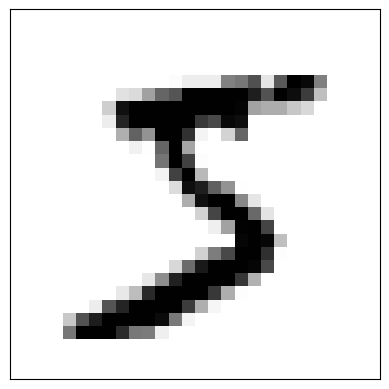

In [3]:
index = 0
img = train_img[index]
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")

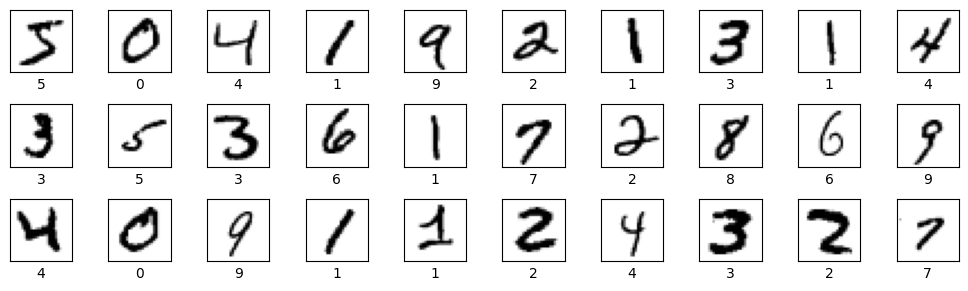

In [4]:
i = 0
plt.figure(figsize = (10,3))
for row in range(3):
    for column in range(10):
        plt.subplot(3, 10, i+1)
        plt.imshow(train_img[i], cmap = plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
train_img = train_img.reshape(-1, 28*28).astype('float32')/255.0
test_img = test_img.reshape(-1, 28*28).astype('float32')/255.0

image in index 0 is '5'


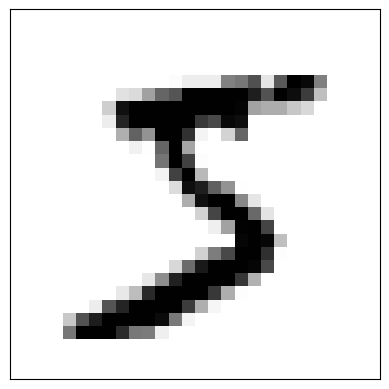

In [6]:
index = 0
img = train_img[index].reshape(28,28)
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")